**STEP 1:   IMPORTING LIBRARIES**

In [38]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from __future__ import division
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score,mean_squared_error
from time import time
from sklearn.metrics import r2_score
import os
from sklearn.model_selection import train_test_split
#Machine Learning
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve, train_test_split


import xgboost as xgb

In [39]:
data = pd.read_csv('kc_house_data.csv')

In [40]:
# Copying data to another dataframe df_train for our convinience so that original dataframe remain intact.
df_train=data.copy()
df_train.rename(columns ={'price': 'SalePrice'}, inplace =True)

In [41]:
# Now lets see the first five rows of the data
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**STEP 2:  DATA CLEANING AND PREPROCESSING**

In [42]:
print(len(data))
# Check the number of features in the data set
print(len(data.columns))
# Check the data types of each column
print(data.dtypes)

21613
21
id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [43]:
# Check any number of columns with NaN or missing values 
print(data.isnull().any().sum(), ' / ', len(data.columns))


0  /  21


In [44]:
# Check any number of data points with NaN
print(data.isnull().any(axis=1).sum(), ' / ', len(data))

0  /  21613


**STEP 3 : FINDING CORRELATION**

In [45]:
# As id and date columns are not important to predict price so we are discarding it for finding correlation
features = data.iloc[:,3:].columns.tolist()
target = data.iloc[:,2].name

In [46]:
# Finding Correlation of price with other variables to see how many variables are strongly correlated with price
correlations = {}
for f in features:
    data_temp = data[[f,target]]
    x1 = data_temp[f].values
    x2 = data_temp[target].values
    key = f + ' vs ' + target
    correlations[key] = pearsonr(x1,x2)[0]

In [47]:
# Printing all the correlated features value with respect to price which is target variable
# Checking Corelation with price 
data_correlations = pd.DataFrame(correlations, index=['Value']).T
data_correlations.loc[data_correlations['Value'].abs().sort_values(ascending=False).index]

,Value
sqft_living vs price,0.702035
grade vs price,0.667434
sqft_above vs price,0.605567
sqft_living15 vs price,0.585379
bathrooms vs price,0.525138
view vs price,0.397293
sqft_basement vs price,0.323816
bedrooms vs price,0.308350
lat vs price,0.307003
waterfront vs price,0.266369


**STEP 4 : EDA or DATA VISUALIZATION **

Let's explore the data

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


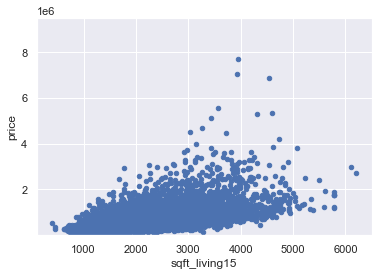

In [48]:
var = 'sqft_living15'
data = pd.concat([data['price'], data[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(3,9500000))

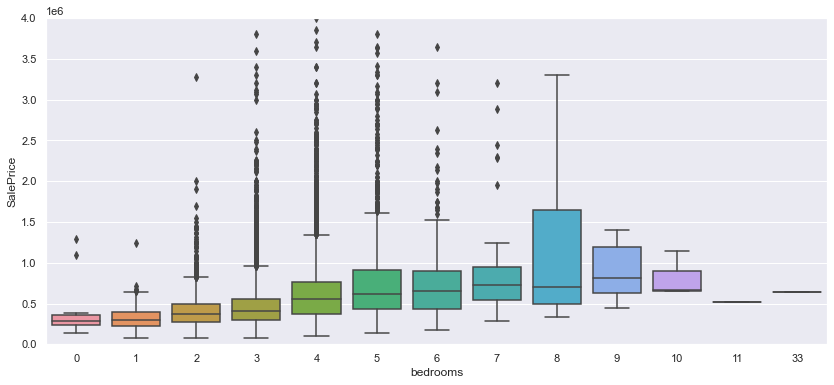

In [49]:
var = 'bedrooms'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=4000000);

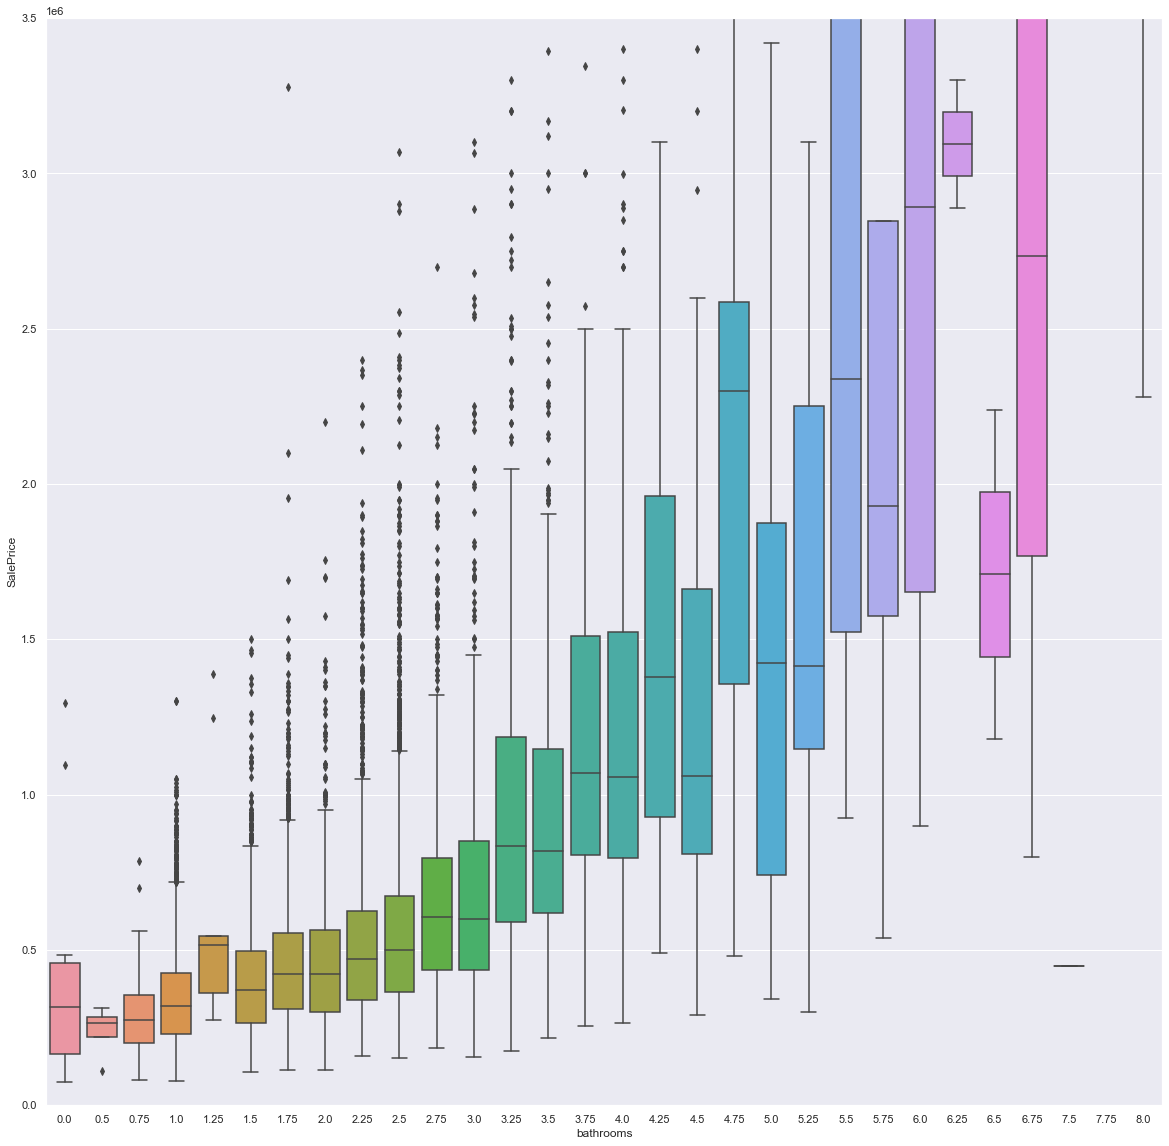

In [50]:
var = 'bathrooms'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 20))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=3500000);

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


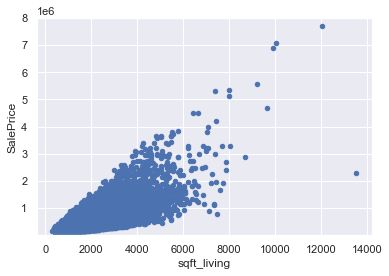

In [51]:
var = 'sqft_living'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(3,8000000));


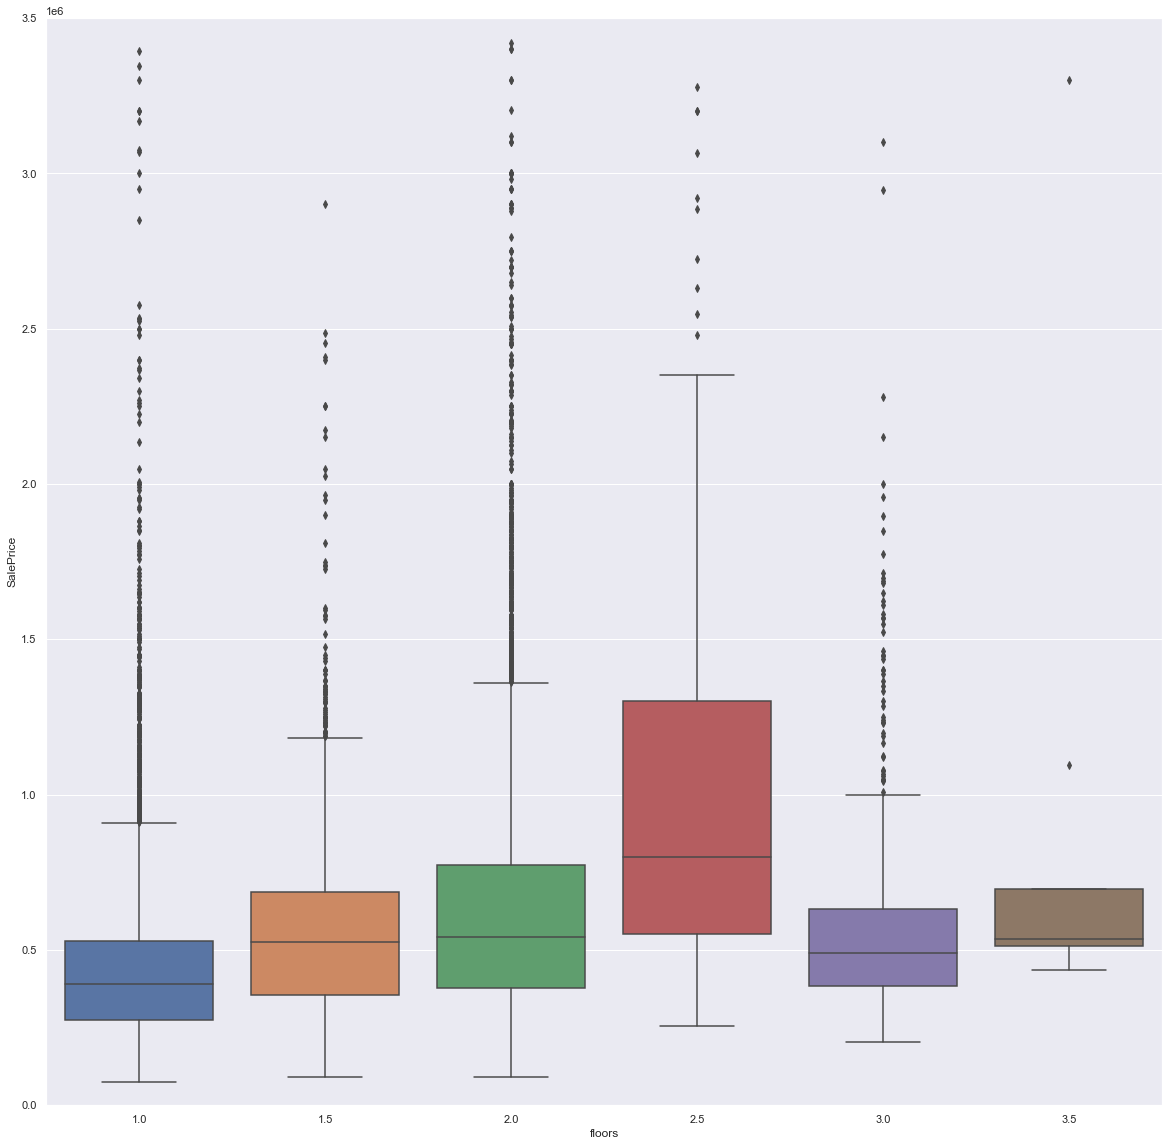

In [52]:
var = 'floors'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 20))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=3500000);

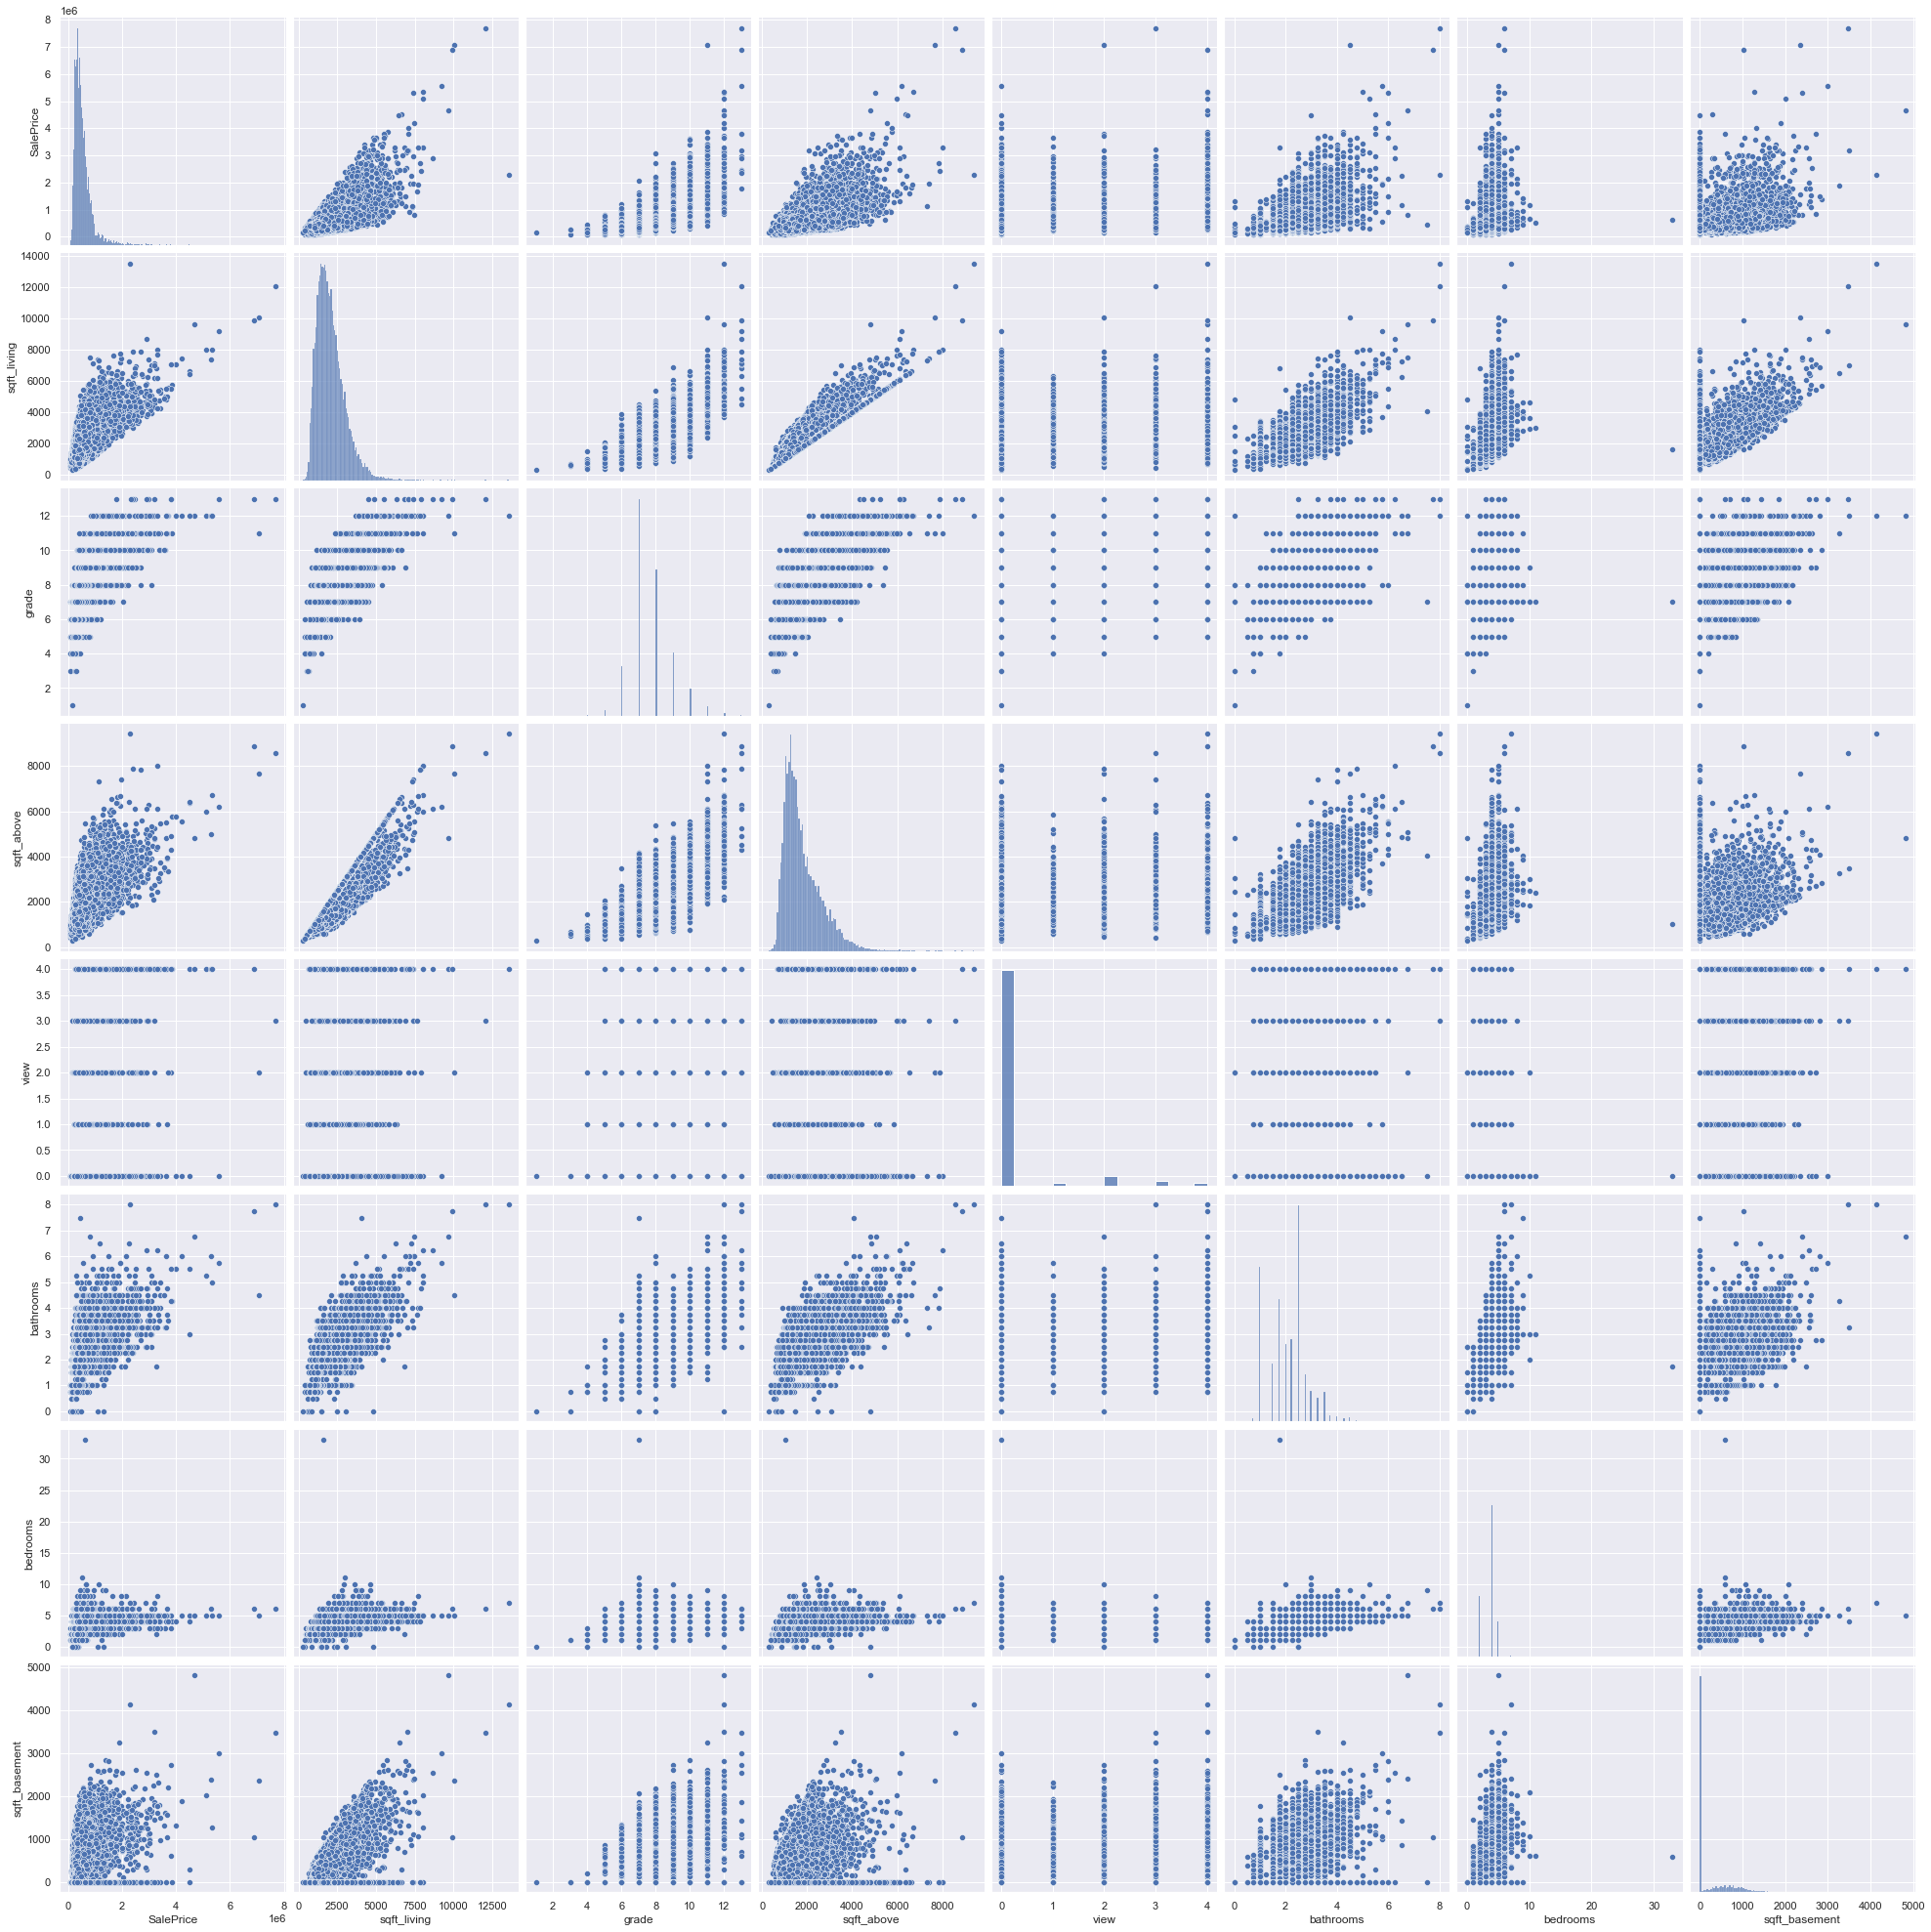

In [17]:
#Pairplots to visualize strong correlation
sns.set()
cols = ['SalePrice', 'sqft_living', 'grade', 'sqft_above', 'view', 'bathrooms','bedrooms','sqft_basement']
sns.pairplot(df_train[cols], height = 3.5)
plt.show();

In [53]:
df_train.dtypes

id                 int64
date              object
SalePrice        float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [54]:
filtered_data = df_train[['sqft_living','grade', 'sqft_above', 'sqft_living15','bathrooms','view','sqft_basement','waterfront','yr_built','lat','bedrooms','long']]

In [55]:
X = filtered_data.values
y = df_train.SalePrice.values

In [56]:
filtered_data.dtypes

sqft_living        int64
grade              int64
sqft_above         int64
sqft_living15      int64
bathrooms        float64
view               int64
sqft_basement      int64
waterfront         int64
yr_built           int64
lat              float64
bedrooms           int64
long             float64
dtype: object

In [22]:
filtered_data.dtypes

sqft_living        int64
grade              int64
sqft_above         int64
sqft_living15      int64
bathrooms        float64
view               int64
sqft_basement      int64
waterfront         int64
yr_built           int64
lat              float64
bedrooms           int64
long             float64
dtype: object

**STEP 5 : SPLITTING DATA INTO TRAINING AND TESTING SET**

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2)

**STEP 6: APPLYING MACHINE LEARNING MODEL**

# Xgboost Regression

##### The most important parameters -


### 1.n_estimators - No of Trees in the Model

### 2.max_leaf_nodes = The maximum number of terminal nodes or leaves in a tree. If this is defined, max_depth will be ignored

### 3.min_child_weight - Defines the minimum sum of weights of all observations required in a child.

### 4.max_depth - Maximum Depth of Tree and can be used to control overfiting 

### 5.subsample- The fraction of samples to be used for fitting the individual base learners

### 6.learning_rate - Learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators

In [59]:
xgb_reg = xgb.XGBRegressor(n_jobs = -1) # default paramters
xgb_reg.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': True,
 'subsample': 1}

In [25]:
xgb_reg.fit(X_train, y_train)

XGBRegressor(n_jobs=-1)

In [26]:
pred = xgb_reg.predict(X_test)

r2score = r2_score(pred,y_test)

In [27]:
pred

array([1247267.1 ,  316819.66,  971641.75, ...,  238590.31,  289306.34,
        260815.23], dtype=float32)

In [28]:
# Calculating R2 Score
r2score

0.8435195739142453

In [29]:
# Calculating Mean Sqaured Error & Root Mean Squared Error
mse = mean_squared_error(y_test, pred)

rmse = math.sqrt(mse)

print(rmse)

127993.00497026308


# HPT  - Random Search for Xgboost Regression

In [30]:
# A parameter grid for XGBoost
params = {
        'n_estimators' : [100, 200, 500, 750], # no of trees 
        'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],  # eta
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.1, 0.5, 1, 1.5, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 10, 12]
        }

folds = 3

param_comb = 100

random_search = RandomizedSearchCV(xgb_reg, param_distributions=params, n_iter=param_comb, n_jobs=-1, cv=3, verbose=3, random_state=42)


In [31]:
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  8.7min finished


RandomizedSearchCV(cv=3, estimator=XGBRegressor(n_jobs=-1), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.1, 0.5, 1, 1.5, 5],
                                        'learning_rate': [0.01, 0.02, 0.05, 0.1,
                                                          0.25],
                                        'max_depth': [3, 4, 5, 10, 12],
                                        'min_child_weight': [1, 5, 7, 10],
                                        'n_estimators': [100, 200, 500, 750],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, verbose=3)

In [32]:
pred_hpt = random_search.predict(X_test)

r2score = r2_score(pred_hpt,y_test)

In [36]:
pred_hpt

array([1243354.8 ,  266174.9 ,  863546.5 , ...,  253656.16,  293393.94,
        271880.5 ], dtype=float32)

In [33]:
r2score

0.884227149868014

In [35]:
# Calculating Mean Sqaured Error & Root Mean Squared Error
mse = mean_squared_error(y_test, pred_hpt)

rmse = math.sqrt(mse)

print(rmse)

112686.08314775101
